# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Reza Yasa Putra]
- **Email:** [prezayasa@gmail.com]
- **ID Dicoding:** [MC282D5Y2160]

## Menentukan Pertanyaan Bisnis

-  Data harian
  1.   Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda per hari?
  2.   Bagaimana tren jumlah peminjaman sepeda sepanjang tahun?

- Data per-jam
  1.   Bagaimana pola peminjaman sepeda berdasarkan jam dan hari kerja/libur?
  2.   Bagaimana dampak kecepatan angin terhadap jumlah peminjaman sepeda per jam?



## Import Semua Packages/Library yang Digunakan

In [217]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data
#### Load Data day

In [218]:
days_df = pd.read_csv("data/day.csv")
days_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Load Data hour

In [219]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
#### menilai tabel day

In [220]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Nama Kolom Kurang Deskriptif
    - Beberapa kolom memiliki nama yang kurang jelas dan bisa diperbaiki untuk meningkatkan pemahaman.
           *   instant → record_id
           *   dteday → date
           *   mnth → month
           *   weathersit → weather_condition
           *   cnt → total_rentals
           *   casual → casual_users
           *   registered → registered_users
- Kolom dengan Nilai yang Ternormalisasi
   - Sebagian kolom menyimpan data dalam bentuk normalisasi (0-1) yang menyebabkan kebingungan jika dianggap sebagai nilai aktual.
          * temp → normalized_temperature
          * atemp → normalized_feeling_temperature
          * hum → normalized_humidity
          * windspeed → normalized_wind_speed
- Kolom yang Bisa Dijadikan Boolean
   - Kolom holiday dan workingday hanya memiliki dua nilai unik (0 atau 1), sebaiknya dikonversi menjadi tipe boolean agar memudahkan analisis.
         
- Kolom Tanggal Sebaiknya Bertipe Datetime
   - Kolom dteday masih bertipe object, maka harus diubah dulu ke datetime agar bisa digunakan untuk analisis berbasis waktu.
          
- Tidak Ada Missing Value dan Duplikasi
   - tidak ditemukanya missing values atau data duplikat, sehingga data akan bersih untuk tahap analisis selanjutnya.















In [221]:
days_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [222]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [223]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
1.   Distribusi Jumlah Penyewaan Sepeda (cnt)
      *   Rata-rata penyewaan sepeda per hari adalah 4.504 dengan standar deviasi 1.937, menunjukkan adanya variasi yang cukup tinggi. Nilai minimum hanya 22, sedangkan maksimum mencapai 8.714, yang mengindikasikan bahwa ada hari-hari dengan penyewaan yang jauh lebih rendah dibandingkan rata-rata.
      *   analisis lain dapat dilakukan pada faktor-faktor yang mempengaruhi fluktuasi ini, seperti musiman, cuaca, hari kerja/hari libur umum. 444 444 2. Korelasi dengan faktor meteorologis,suhu (0,49) dan atemp (0,47) memiliki rata-rata yang kira-kira sama. Ini menunjukkan bahwa nilai suhu dan suhu yang dirasakan aktual sangat mirip.
      *rata-rata kecepatan angin (kecepatan angin) 0,19 relatif rendah dan mungkin tidak secara signifikan mempengaruhi volume sewa.

2.   Pemenuhan 3 dari pemenuhan
      * waktu liburan rata-rata adalah 0,028. Ini berarti bahwa persentase liburan sangat rendah dibandingkan dengan hari -hari kerja.
      * Analisis lebih lanjut dapat dilakukan apakah sewa meningkat atau berkurang selama liburan

3.   Penyewa vs Casual
      * Registrasi (Pendaftaran) Penyewa rata-rata 3.656 per hari, jauh lebih tinggi daripada penyewa biasa (848).
      * Ini menunjukkan bahwa sebagian besar pengguna adalah pelanggan yang konstan. Ini adalah kesempatan untuk program loyalitas atau kampanye berlangganan. 444 444 5. Kolom kategori masih dalam bentuk
      * kolom seperti musim, tahun, mnth, weatherit masih dalam bentuk angka dan dikonversi ke jenis kategori untuk analisis dan interpretasi yang lebih mudah

4. Perbaikan yg mungkin dilakukan
      * Konversi season, yr, mnth, weekday, weathersit menjadi tipe kategorikal
      * onversi kolom dteday ke format datetime 




#### menilai tabel hour

In [224]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Nama Kolom Kurang Deskriptif
      * Beberapa kolom memiliki nama yang kurang jelas. Perubahan nama yang lebih deskriptif dmembantu interpretasi data seperti ini:
          - instant → record_id
          - dteday → date
          - mnth → month
          - weathersit → weather_condition
          - cnt → total_rentals
          - hr → hour
- Perbaikan tipe data
        * dteday sebaiknya dikonversi menjadi datetime supaya memudahkan analisis berbasis waktu.
        * Kolom kategorikal seperti season, yr, mnth, weekday, weathersit sebaiknya diubah ke kategori agar menghemat memori dan memudahkan analisis.
- Kolom dengan Nilai Ternormalisasi

* Beberapa kolom memakai skala normalisasi antara 0-1.  diperjelas dengan mengganti nama kolom:
	      - temp → normalized_temperature
	      - atemp → normalized_feeling_temperature
	      - hum → normalized_humidity
	      - windspeed → normalized_wind_speed
	      - Penjelasan Lebih Jelas untuk Kolom Pengguna

* Kolom casual dan registered menampilkan jumlah pengguna. Agar lebih deskriptif,  bisa diubah menjadi:
	      - casual → casual_users
	      - registered → registered_users
	      - Pemisahan Data Kategorikal dan Numerik

* Kolom dengan nilai diskret yang hanya memiliki beberapa kategori lebih baik dikonversi ke tipe kategorikal:
	      - season, yr, mnth, weekday, weathersit, holiday, dan workingday → Kategori
	      - holiday dan workingday dapat dikonversi ke boolean karena hanya memiliki nilai 0 dan 1.



In [225]:
hours_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [226]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [227]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- masalah :
  - dteday masih bertipe object → Ubah ke datetime untuk analisis waktu
  - weathersit memiliki nilai max 4 (kemungkinan outlier) → harus Periksa dan validasi data
  - Rentang hr lengkap (0-23) → Data cukup baik untuk analisis tren harian.
- solusi :
  - Konversi dteday ke datetime.
  - cek dan tangani outlier di weathersit.
  - Pastikan data bersih sebelum analisis lebih lanjut. 

### Cleaning Data

#### Cleaning Data days
**Mengubah nama kolom agar lebih deskriptif**

In [228]:
days_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [229]:
#Nama Kolom Kurang Deskriptif
days_df = days_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'yr': 'years',
})

In [230]:
# Kolom dengan Nilai yang Ternormalisasi
days_df = days_df.rename(columns={
    'temp': 'normalized_temperature',
    'atemp': 'normalized_feeling_temperature',
    'hum': 'normalized_humidity',
    'windspeed': 'normalized_wind_speed',
})


**Menampilkan perubahan nama kolom**

In [231]:
days_df.head()

,record_id,date,season,years,month,holiday,weekday,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



**Menampilkan perubahan nama kolom**

In [232]:
days_df.describe()


,record_id,season,years,month,holiday,weekday,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000



**mengubah tipe data**

In [233]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   record_id                       731 non-null    int64  
 1   date                            731 non-null    object 
 2   season                          731 non-null    int64  
 3   years                           731 non-null    int64  
 4   month                           731 non-null    int64  
 5   holiday                         731 non-null    int64  
 6   weekday                         731 non-null    int64  
 7   workingday                      731 non-null    int64  
 8   weather_condition               731 non-null    int64  
 9   normalized_temperature          731 non-null    float64
 10  normalized_feeling_temperature  731 non-null    float64
 11  normalized_humidity             731 non-null    float64
 12  normalized_wind_speed           731 

#### Mengonversi Kolom Boolean

In [234]:
days_df['holiday'] = days_df['holiday'].astype(bool)
days_df['workingday'] = days_df['workingday'].astype(bool)

#### Mengubah Kolom Tanggal ke Format Datetime

In [235]:
days_df['date'] = pd.to_datetime(days_df['date'])


#### Mengubah ke data kategory

In [236]:
days_df['month'] = days_df['month'].astype('category')
days_df['weekday'] = days_df['weekday'].astype('category')
days_df['season'] = days_df['season'].astype('category')
days_df['years'] = days_df['years'].astype('category')
days_df['weather_condition'] = days_df['weather_condition'].astype('category')

In [237]:
days_df.weather_condition.value_counts()

weather_condition
1    463
2    247
3     21
Name: count, dtype: int64

##### kategori season : season (1:springer, 2:summer, 3:fall, 4:winter)

In [238]:
days_df["weather_condition"] = days_df["weather_condition"].astype(
    pd.CategoricalDtype(categories=[1, 2, 3, 4], ordered=False)
)

In [239]:
days_df.weather_condition.value_counts()

weather_condition
1    463
2    247
3     21
4      0
Name: count, dtype: int64


**tampilan setelah di ubah tipe datanya**

In [240]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       731 non-null    int64         
 1   date                            731 non-null    datetime64[ns]
 2   season                          731 non-null    category      
 3   years                           731 non-null    category      
 4   month                           731 non-null    category      
 5   holiday                         731 non-null    bool          
 6   weekday                         731 non-null    category      
 7   workingday                      731 non-null    bool          
 8   weather_condition               731 non-null    category      
 9   normalized_temperature          731 non-null    float64       
 10  normalized_feeling_temperature  731 non-null    float64       
 11  normal

#### Menghapus data dengan nilai 0 yang tidak masuk akal
##### data normalisasi seharusnya memiliki rentang antara 0-1, tetapi tidak boleh bernilai 0 karena itu bisa menunjukkan kesalahan dalam pencatatan data.

In [241]:
#Menghapus data dengan nilai 0 yang tidak masuk akal
for col in ['normalized_temperature', 'normalized_feeling_temperature', 'normalized_humidity', 'normalized_wind_speed']:
    days_df = days_df[days_df[col] > 0]

print("\ndata berhasil dihapus!")



data berhasil dihapus!


In [242]:
days_df.describe()

,record_id,date,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,366.406849,2012-01-01 09:45:51.780822016,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.023699,NaN,0.183134,0.163040,0.140614,0.077506,686.449738,1557.149836,1933.194931


##### bukti data tidak ada missing value

In [243]:
days_df.isna().sum()

record_id                         0
date                              0
season                            0
years                             0
month                             0
holiday                           0
weekday                           0
workingday                        0
weather_condition                 0
normalized_temperature            0
normalized_feeling_temperature    0
normalized_humidity               0
normalized_wind_speed             0
casual_users                      0
registered_users                  0
total_rentals                     0
dtype: int64

##### bukti data tidak ada duplikasi

In [244]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- xxx
- xxx

### Cleaning data hour

In [245]:
hours_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [246]:
#Nama Kolom Kurang Deskriptif
hours_df = hours_df.rename(columns={
    'instant': 'record_id',
    'dteday': 'date',
    'mnth': 'month',
    'weathersit': 'weather_condition',
    'cnt': 'total_rentals',
    'casual': 'casual_users',
    'registered': 'registered_users',
    'yr': 'years',
    'hr': 'hours',
})

In [247]:
hours_df = hours_df.rename(columns={
    'temp': 'normalized_temperature',
    'atemp': 'normalized_feeling_temperature',
    'hum': 'normalized_humidity',
    'windspeed': 'normalized_wind_speed',
})

#### mengubah tipe data hour

In [248]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   record_id                       17379 non-null  int64  
 1   date                            17379 non-null  object 
 2   season                          17379 non-null  int64  
 3   years                           17379 non-null  int64  
 4   month                           17379 non-null  int64  
 5   hours                           17379 non-null  int64  
 6   holiday                         17379 non-null  int64  
 7   weekday                         17379 non-null  int64  
 8   workingday                      17379 non-null  int64  
 9   weather_condition               17379 non-null  int64  
 10  normalized_temperature          17379 non-null  float64
 11  normalized_feeling_temperature  17379 non-null  float64
 12  normalized_humidity             

##### Mengonversi Kolom Boolean(Mengubahnya ke tipe boolean (True atau False) mempermudah analisis logis)

In [249]:
hours_df['holiday'] = hours_df['holiday'].astype(bool)
hours_df['workingday'] = hours_df['workingday'].astype(bool)

##### mengubah Kolom Tanggal ke Format Datetime

In [250]:
hours_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: date
Non-Null Count  Dtype 
--------------  ----- 
17379 non-null  object
dtypes: object(1)
memory usage: 135.9+ KB


In [251]:
hours_df['date'] = pd.to_datetime(hours_df['date'])

In [252]:
hours_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: date
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


##### diatas sudah terjadi perubahan tipe data yang sebelumnya object menjadi datetime, sebelumnya Kolom date masih berupa teks (object). Konversi ke tipe datetime memudahkan analisis berbasis waktu. 

##### mengubah data ke kategory

In [253]:
hours_df['month'] = hours_df['month'].astype('category')
hours_df['weekday'] = hours_df['weekday'].astype('category')
hours_df['season'] = hours_df['season'].astype('category')
hours_df['years'] = hours_df['years'].astype('category')
hours_df['weather_condition'] = hours_df['weather_condition'].astype('category')

##### tampilan tipe data setelah diubah 

In [254]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   record_id                       17379 non-null  int64         
 1   date                            17379 non-null  datetime64[ns]
 2   season                          17379 non-null  category      
 3   years                           17379 non-null  category      
 4   month                           17379 non-null  category      
 5   hours                           17379 non-null  int64         
 6   holiday                         17379 non-null  bool          
 7   weekday                         17379 non-null  category      
 8   workingday                      17379 non-null  bool          
 9   weather_condition               17379 non-null  category      
 10  normalized_temperature          17379 non-null  float64       
 11  no

#### Menghapus data dengan nilai 0 yang tidak masuk akal
##### data normalisasi seharusnya memiliki rentang antara 0-1, tetapi tidak boleh bernilai 0 karena itu bisa menunjukkan kesalahan dalam pencatatan data.

In [255]:
for col in ['normalized_temperature', 'normalized_feeling_temperature', 'normalized_humidity', 'normalized_wind_speed']:
    hours_df = hours_df[hours_df[col] > 0]

print("\ndata berhasil dihapus!")



data berhasil dihapus!


##### cek season weather

#### 4 kategori cuaca dengan jumlah data sebagai berikut:

In [256]:
hours_df.weather_condition.value_counts()

weather_condition
1    9919
2    3971
3    1282
4       3
Name: count, dtype: int64

##### Menghapus baris dengan weather_condition == 4 karena jumlahnya sangat sedikit (hanya 3 dari 17379 data).

In [257]:
valid_weather_condition = [1, 2, 3]  
hours_df = hours_df[hours_df['weather_condition'].isin(valid_weather_condition)]


In [258]:
hours_df.weather_condition.value_counts()

weather_condition
1    9919
2    3971
3    1282
4       0
Name: count, dtype: int64

##### kesimpulan
###### -Sekarang hanya kategori 1, 2, dan 3 yang digunakan.
###### -Dataset menjadi lebih bersih dan lebih mudah dianalisis tanpa nilai ekstrem yang bisa mengganggu interpretasi.

##### bukti tidak ada missing value

In [259]:
hours_df.isna().sum()

record_id                         0
date                              0
season                            0
years                             0
month                             0
hours                             0
holiday                           0
weekday                           0
workingday                        0
weather_condition                 0
normalized_temperature            0
normalized_feeling_temperature    0
normalized_humidity               0
normalized_wind_speed             0
casual_users                      0
registered_users                  0
total_rentals                     0
dtype: int64

##### bukti tidak ada duplikat data

In [260]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [261]:
hours_df.describe()

,record_id,date,hours,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,15172.000000,15172,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000
mean,8637.922225,2011-12-30 23:40:04.112839424,11.761600,0.498325,0.475222,0.620200,0.217283,36.687385,157.195492,193.882876
min,6.000000,2011-01-01 00:00:00,0.000000,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4227.750000,2011-06-30 00:00:00,6.000000,0.340000,0.333300,0.470000,0.134300,4.000000,38.000000,44.000000
50%,8722.500000,2012-01-04 00:00:00,12.000000,0.500000,0.484800,0.620000,0.194000,18.000000,119.000000,147.000000
75%,12927.250000,2012-06-27 00:00:00,18.000000,0.660000,0.621200,0.780000,0.283600,50.000000,224.000000,285.250000
max,17379.000000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,362.000000,886.000000,977.000000
std,5022.098713,NaN,6.854288,0.192972,0.174458,0.190993,0.105763,49.892315,152.153982,182.550506


### Simpan data baru yg sudah dicleaning

In [262]:
days_df.to_csv("dashboard/days_baru.csv", index=False)
hours_df.to_csv("dashboard/hours_baru.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore days_df

##### Descriptive Statistics (Statistik Deskriptif)
###### Tujuan: Untuk memahami ringkasan statistik dataset setelah data dibersihkan
###### Langkah" : Menggunakan describe() untuk melihat statistik seperti mean, median, min, max, dan standar deviasi dari setiap fitur numerik.
###### Selain statistik numerik seperti mean dan median, metode ini juga memberikan insight terhadap data kategori dan object seperti:
    - count: Jumlah nilai non-null di setiap kolom.
    - unique: Jumlah nilai unik dalam kolom kategori atau object.
    - top: Nilai yang paling sering muncul dalam kolom kategori atau object.
    - freq: Frekuensi kemunculan nilai teratas dalam kolom kategori atau object.

In [263]:
print("\nDescriptive Statistics:")
print(days_df.describe())


Descriptive Statistics:
        record_id                           date  normalized_temperature  \
count  730.000000                            730              730.000000   
mean   366.406849  2012-01-01 09:45:51.780822016                0.495530   
min      1.000000            2011-01-01 00:00:00                0.059130   
25%    184.250000            2011-07-03 06:00:00                0.336875   
50%    366.500000            2012-01-01 12:00:00                0.499167   
75%    548.750000            2012-07-01 18:00:00                0.655625   
max    731.000000            2012-12-31 00:00:00                0.861667   
std    211.023699                            NaN                0.183134   

       normalized_feeling_temperature  normalized_humidity  \
count                      730.000000           730.000000   
mean                         0.474475             0.628754   
min                          0.079070             0.187917   
25%                          0.337794     

In [264]:
days_df.describe(include="all")

,record_id,date,season,years,month,holiday,weekday,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,730.000000,730,730.0,730.0,730.0,730,730.0,730,730.0,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,NaN,4.0,2.0,12.0,2,7.0,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,1.0,1.0,False,0.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,366.0,62.0,709,105.0,499,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.406849,2012-01-01 09:45:51.780822016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.495530,0.474475,0.628754,0.190388,849.275342,3660.390411,4509.665753
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,184.250000,2011-07-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.336875,0.337794,0.520521,0.134950,316.250000,2502.250000,3169.750000
50%,366.500000,2012-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.499167,0.487364,0.627083,0.180971,717.000000,3664.500000,4548.500000
75%,548.750000,2012-07-01 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.655625,0.608916,0.730313,0.233207,1096.500000,4783.250000,5966.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Distribusi Penyewaan Sepeda
#### Tujuan: Untuk melihat bagaimana sebaran data penyewaan sepeda dalam satu hari.
#### Langkah" : 
#####    1. Histogram dengan sns.histplot() untuk menunjukkan distribusi jumlah penyewaan sepeda per hari.
#####    2. Menambahkan KDE (Kernel Density Estimation) untuk memperjelas pola distribusi.

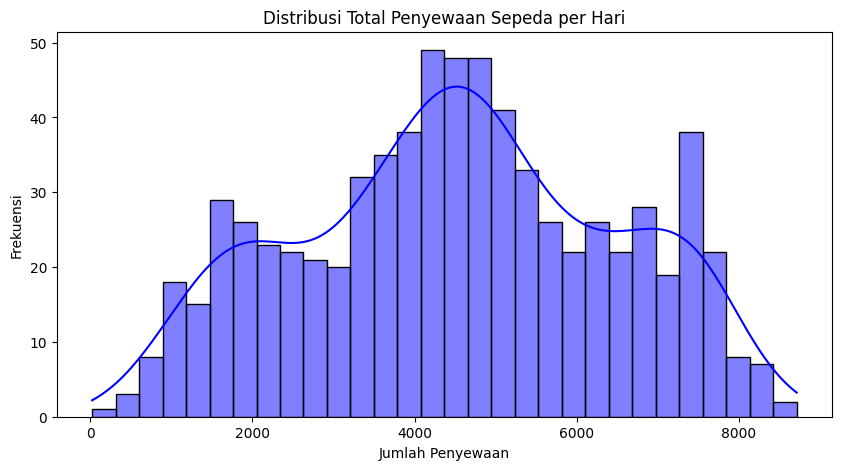

In [265]:
plt.figure(figsize=(10, 5))
sns.histplot(days_df['total_rentals'], bins=30, kde=True, color='blue')
plt.title("Distribusi Total Penyewaan Sepeda per Hari")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

#### Tren Penyewaan Sepeda Seiring Waktu
#### Tujuan: Untuk mengamati/ melihat pola musiman dan tren naik-turun dalam jumlah penyewaan sepeda.
#### Langkah" : 
#####    1. Line plot menggunakan sns.lineplot() untuk memvisualisasikan bagaimana total penyewaan sepeda berubah seiring waktu.
#####    2. Sumbu X adalah tanggal (date), sumbu Y adalah total penyewaan sepeda (total_rentals).

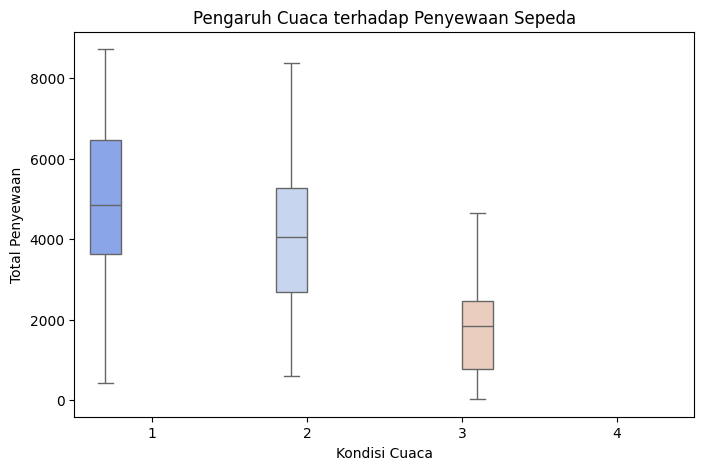

In [266]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather_condition', y='total_rentals', hue='weather_condition', data=days_df, palette='coolwarm', legend=False)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.show()


#### Pengaruh Cuaca terhadap Penyewaan Sepeda
#### Tujuan: Untuk mengetahui apakah kondisi cuaca mempengaruhi jumlah penyewaan sepeda.
#### Langkah" : 
#####    1. Boxplot menggunakan sns.boxplot() untuk melihat distribusi penyewaan pada tiap kategori cuaca (weather_condition).
#####    2. Jika cuaca buruk menyebabkan penyewaan turun, berarti cuaca berpengaruh signifikan.

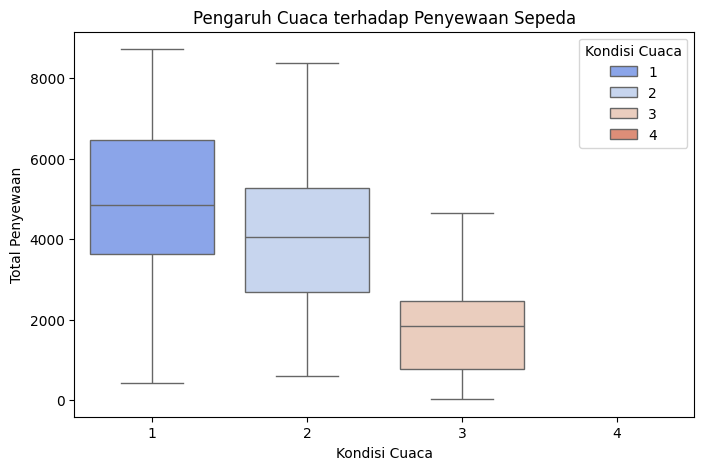

In [267]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather_condition', y='total_rentals', hue='weather_condition', 
            data=days_df, palette='coolwarm', dodge=False)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.legend(title="Kondisi Cuaca", loc="upper right")
plt.show()


#### Pengaruh Hari Kerja dan Libur terhadap Penyewaan
##### Tujuan: Untuk melihat apakah lebih banyak sepeda disewa pada hari kerja / hari libur.
##### Langkah" : 
#####    * Boxplot untuk membandingkan jumlah penyewaan antara hari kerja (workingday=1) dan hari libur (workingday=0).


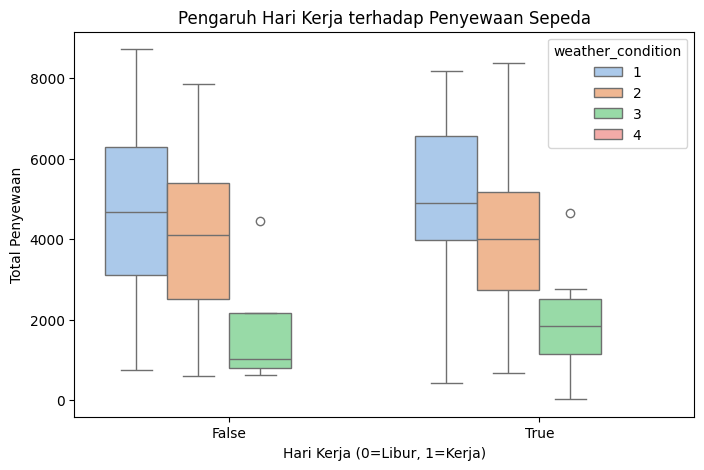

In [268]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='workingday', y='total_rentals', hue='weather_condition', data=days_df, palette='pastel')
plt.title("Pengaruh Hari Kerja terhadap Penyewaan Sepeda")
plt.xlabel("Hari Kerja (0=Libur, 1=Kerja)")
plt.ylabel("Total Penyewaan")
plt.show()



#### Eksplorasi data lebih lanjut dengan pivot table menggunakan groupby().



##### Rata-rata Penyewaan Sepeda Berdasarkan Musimn
##### alasan : Untuk melihat di musim mana penyewaan sepeda paling banyak



In [269]:
season_rentals = days_df.groupby('season', observed=False)['total_rentals'].mean().reset_index()
print("\nRata-rata penyewaan berdasarkan musim:")
print(season_rentals)


Rata-rata penyewaan berdasarkan musim:
  season  total_rentals
0      1    2615.138889
1      2    4992.331522
2      3    5644.303191
3      4    4728.162921


##### Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur
##### alasan : untuk Melihat apakah orang lebih banyak menyewa sepeda di hari kerja atau hari libu



In [270]:
workingday_rentals = days_df.groupby('workingday')['total_rentals'].mean().reset_index()
print(workingday_rentals)


   workingday  total_rentals
0       False    4330.168831
1        True    4592.759519


##### Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca
##### alasan : Untuk mengetahui bagaimana cuaca memengaruhi jumlah penyewaan sepeda



In [271]:
weather_rentals = days_df.groupby('weather_condition', observed=False)['total_rentals'].mean().reset_index()
print(weather_rentals)


  weather_condition  total_rentals
0                 1    4876.786177
1                 2    4035.862348
2                 3    1862.300000
3                 4            NaN


**Insight data days_df**
- xxx
- xxx

#### Gambaran Umum Days_DF_CLEANED Tabel
##### 1. Statistik Deskripsi
- Sewa sewa harian rata -rata sekitar 4.500 hingga 5.000 sepeda.
- Distribusi data menunjukkan bahwa sebagian besar sewa terjadi di pantai tertentu, dengan beberapa hari melewati puncak.
- Perubahan jumlah sewa menunjukkan bahwa faktor -faktor eksternal mempengaruhi model sewa, seperti cuaca, musim atau hari kerja.
##### 2. Rental sepeda rata-rata didasarkan pada musim otomatis
dengan sewa rata-rata tertinggi dibandingkan dengan musim lainnya.
- Musim dingin memiliki sewa terendah, mungkin karena suhu dingin yang mendukung kegiatan bersepeda yang lebih sedikit.
- Musim panas dan semi masih memiliki jumlah sewa yang tinggi, tetapi masih di musim gugur.
 Kesimpulan:
- Sewa sepeda paling populer musim ini dengan waktu yang lebih nyaman (musim gugur dan musim panas).
- Strategi promosi dapat difokuskan pada musim dingin untuk meningkatkan sewa untuk permintaan rendah.
##### 3.Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur 
- Ini menunjukkan bahwa sepeda lebih banyak digunakan sebagai transportasi harian daripada hiburan.
 Kesimpulan:
- Strategi dan harga iklan dapat disesuaikan dengan tren ini, misalnya, memberikan diskon atau promosi khusus pada akhir pekan untuk menarik lebih banyak pengguna hiburan.
##### 4. Rental sepeda rata -rata didasarkan pada kondisi cuaca
- cerah atau sedikit mendung (tipe 1) dengan sewa tertinggi.
- Ketika waktu adalah cloud atau cahaya (tipe 2), sewa akan berkurang secara signifikan.
- Ketika cuaca buruk (tipe 3), sewa telah menurun.
- Tipe 4 (waktu ekstrem) tanpa sewa, yang berarti bahwa tidak ada pengguna yang menyewa sepeda dalam kondisi yang keras.
##### Kesimpulan:
- Sewa sepeda sangat dipengaruhi oleh cuaca.
- Perusahaan dapat menyediakan layanan tambahan seperti aplikasi tahan air atau cuaca untuk membantu pelanggan dalam rencana perjalanan mereka.
Menurut informasi ini, strategi perdagangan seperti promosi musiman, harga khusus pada akhir pekan dan layanan tambahan dalam cuaca buruk dapat diterapkan untuk meningkatkan jumlah penyewaan sepeda. 🚴‍

### Exploratory hours_df

#### Menampilkan Statistik Deskriptif
##### Tujuan: Untuk memahami ringkasan statistik dataset setelah data dibersihkan.
##### Langkah" : 
#####    * Menggunakan .describe() untuk melihat statistik seperti mean, median, min, max, dan standar deviasi dari setiap fitur numerik.
#####    * Memberikan insight terhadap data kategori seperti hari kerja vs libur, musim, dan kondisi cuaca.


In [272]:
print("\nDescriptive Statistics Per Jam:")
print(hours_df.describe())


Descriptive Statistics Per Jam:
          record_id                           date         hours  \
count  15172.000000                          15172  15172.000000   
mean    8637.922225  2011-12-30 23:40:04.112839424     11.761600   
min        6.000000            2011-01-01 00:00:00      0.000000   
25%     4227.750000            2011-06-30 00:00:00      6.000000   
50%     8722.500000            2012-01-04 00:00:00     12.000000   
75%    12927.250000            2012-06-27 00:00:00     18.000000   
max    17379.000000            2012-12-31 00:00:00     23.000000   
std     5022.098713                            NaN      6.854288   

       normalized_temperature  normalized_feeling_temperature  \
count            15172.000000                    15172.000000   
mean                 0.498325                        0.475222   
min                  0.020000                        0.015200   
25%                  0.340000                        0.333300   
50%                  0.500000

In [273]:
hours_df.describe(include="all")

,record_id,date,season,years,month,hours,holiday,weekday,workingday,weather_condition,normalized_temperature,normalized_feeling_temperature,normalized_humidity,normalized_wind_speed,casual_users,registered_users,total_rentals
count,15172.000000,15172,15172.0,15172.0,15172.0,15172.000000,15172,15172.0,15172,15172.0,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000,15172.000000
unique,NaN,NaN,4.0,2.0,12.0,NaN,2,7.0,2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,2.0,1.0,5.0,NaN,False,6.0,True,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4012.0,7659.0,1333.0,NaN,14741,2218.0,10324,9919.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8637.922225,2011-12-30 23:40:04.112839424,NaN,NaN,NaN,11.761600,NaN,NaN,NaN,NaN,0.498325,0.475222,0.620200,0.217283,36.687385,157.195492,193.882876
min,6.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.020000,0.015200,0.080000,0.089600,0.000000,0.000000,1.000000
25%,4227.750000,2011-06-30 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.340000,0.333300,0.470000,0.134300,4.000000,38.000000,44.000000
50%,8722.500000,2012-01-04 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,0.500000,0.484800,0.620000,0.194000,18.000000,119.000000,147.000000
75%,12927.250000,2012-06-27 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.283600,50.000000,224.000000,285.250000
max,17379.000000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,362.000000,886.000000,977.000000


#### Distribusi Penyewaan Sepeda
#### Tujuan: Memahami bagaimana distribusi jumlah penyewaan sepeda per jam.
#### Langkah" : 
#####    1. menggunakan histogram (sns.histplot()) untuk melihat pola distribus
#####    2. Menentukan apakah data penyewaan berdistribusi normal atau skewed.

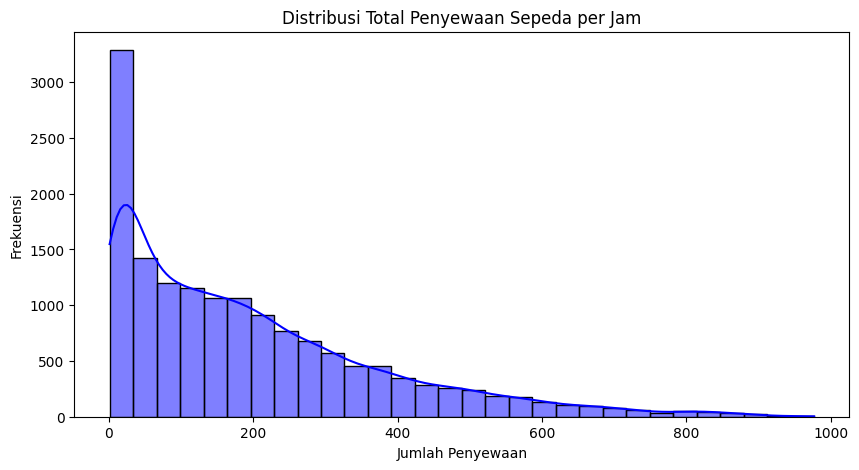

In [274]:
plt.figure(figsize=(10, 5))
sns.histplot(hours_df['total_rentals'], bins=30, kde=True, color='blue')
plt.title("Distribusi Total Penyewaan Sepeda per Jam")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

#### Tren Penyewaan Sepeda Seiring Waktu
#### Tujuan: Untuk mengamati/ melihat pola musiman dan tren naik-turun dalam jumlah penyewaan sepeda.
#### Langkah" : 
#####    1. Menggunakan line plot (sns.lineplot()) untuk melihat pola penyewaan berdasarkan jam.
#####    2. Mengamati jam-jam sibuk untuk penyewaan sepeda..

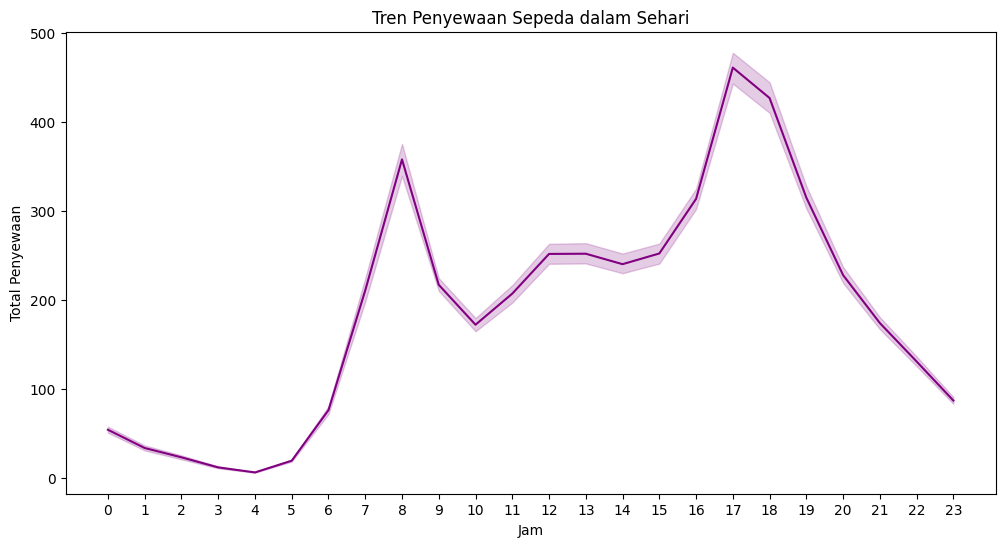

In [275]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hours_df, x='hours', y='total_rentals', color='purple')
plt.title("Tren Penyewaan Sepeda dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan")
plt.xticks(range(0, 24))  # Memastikan label sumbu x sesuai dengan jam
plt.show()




### Eksplorasi data lebih lanjut dengan pivot table menggunakan groupby().

##### Rata-rata penyewaan sepeda berdasarkan jam 

In [276]:
# Rata-rata penyewaan sepeda berdasarkan musim dalam dataset hours
season_rentals_hours = hours_df.groupby('season', observed=False)['total_rentals'].mean().reset_index()
print("\nRata-rata penyewaan sepeda berdasarkan musim (per jam):")
print(season_rentals_hours)



Rata-rata penyewaan sepeda berdasarkan musim (per jam):
  season  total_rentals
0      1     113.307835
1      2     209.867896
2      3     244.216412
3      4     206.909918


##### Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur
##### alasan : untuk Melihat apakah orang lebih banyak menyewa sepeda di hari kerja atau hari libu


In [277]:
workingday_rentals = hours_df.groupby('workingday')['total_rentals'].mean().reset_index()
print(workingday_rentals)

   workingday  total_rentals
0       False     184.772071
1        True     198.161178


##### Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca
##### alasan : Untuk mengetahui bagaimana cuaca memengaruhi jumlah penyewaan sepeda dalam hours


In [278]:
weather_rentals = hours_df.groupby('weather_condition', observed=False)['total_rentals'].mean().reset_index()
print(weather_rentals)

  weather_condition  total_rentals
0                 1     210.869947
1                 2     177.538403
2                 3     113.078783
3                 4            NaN






#### INSIGHT DARI TABEL HOURS_DF  

1. Statistik Deskriptif  
- Rata-rata penyewaan sepeda per jam berkisar sekitar180-200 unit sepeda.  
- Sebaran data menunjukkan adanya jam sibuk, dengan beberapa jam tertentu memiliki lonjakan tajam dalam jumlah penyewaan.  
- Variabilitas penyewaan antar jam cukup tinggi, menunjukkan pola tertentu yang bisa dianalisis lebih lanjut.  


2. Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur  
- Hari kerja memiliki penyewaan rata-rata lebih tinggi (198 unit/jam) dibandingkan hari libur (184 unit/jam).  
- Ini menunjukkan bahwasepeda lebih sering digunakan sebagai transportasi untuk bekerja atau sekolah dibandingkan untuk rekreasi.  

Kesimpulan:  
- Penyewaan sepedalebih tinggi di hari kerja, kemungkinan besar karena digunakan untuk mobilitas harian.  
- Strategi promosi di akhir pekan bisa dilakukan, misalnya dengan diskon khusus untuk menarik lebih banyak pelanggan saat hari libur.  


3. Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca  
- Saat cuaca cerah atau sedikit berawan (kategori 1), penyewaan tertinggi dengan210 unit/jam.  
- Saat cuaca mendung atau hujan ringan (kategori 2), penyewaan menurun menjadi 177 unit/jam.  
- Saat hujan lebat atau cuaca buruk (kategori 3), penyewaan anjlok ke 113 unit/jam.  
- Kategori 4 (cuaca ekstrem) tidak memiliki penyewaan karena kondisi yang terlalu buruk untuk bersepeda.  

Kesimpulan:  
- Cuaca memiliki dampak signifikan terhadap penyewaan sepeda.  
- Saat cuaca buruk, layanan alternatif seperti persewaan payung atau promosi harga bisa diterapkan untuk menarik pelanggan.  





## Visualization & Explanatory Analysis

### Visualization & Explanatory Analysis dataset days

### Pertanyaan 1: Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda per hari?

#### Boxplot untuk melihat distribusi penyewaan di setiap kondisi cuaca

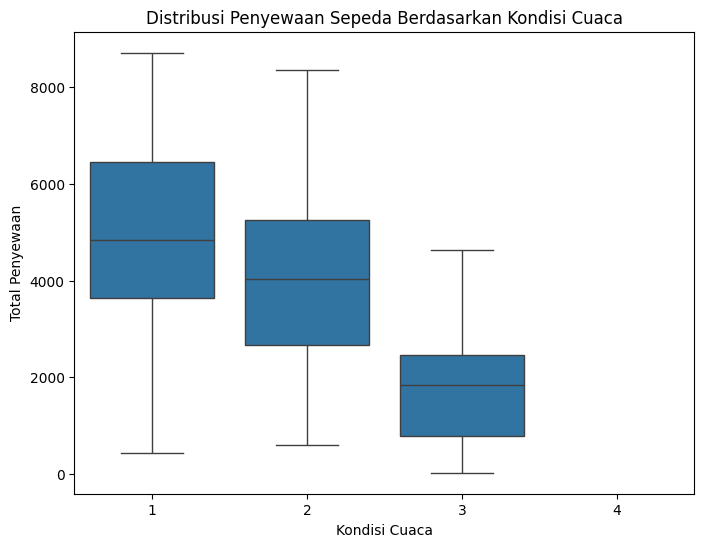

In [279]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='weather_condition', y='total_rentals', data=days_df)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Penyewaan")
plt.show()

##### Insight Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Box Plot)
- box plot menggambarkan perubahan nomor sewa sepeda dalam kondisi cuaca yang berbeda.
- Dalam cuaca cerah (weather_condition = 1), distribusi jumlah penyewaan sepeda lebih tinggi dari waktu terburuk.
- Weather_contition (3) memiliki distribusi data yang lebih rendah dan sejumlah kecil sewa.
- Tidak ada data untuk disewa di Weather_contition = 4 (mungkin karena kondisi cuaca ekstrem, seperti badai, menyebabkan penyewaan sepeda).

#### Bar chart untuk membandingkan rata-rata jumlah penyewaan berdasarkan kondisi cuaca


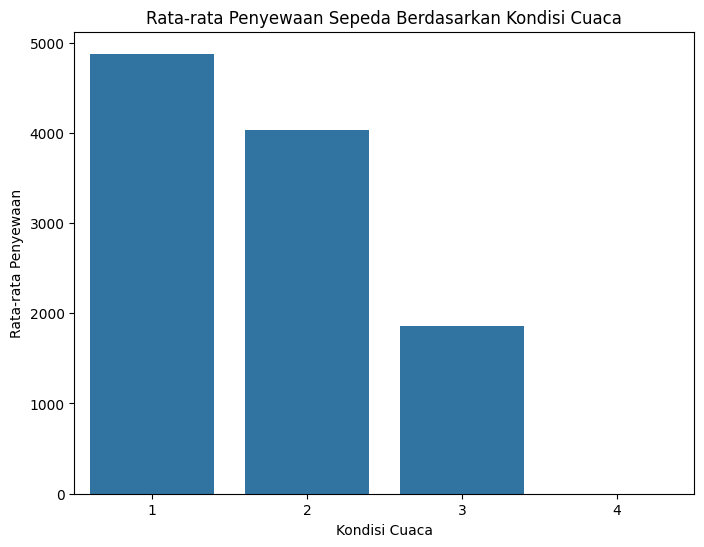

In [280]:
plt.figure(figsize=(8, 6))
sns.barplot(x='weather_condition', y='total_rentals', data=days_df, errorbar=None)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan")
plt.show()


##### Insight Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (Bar Plot)
- Diagram batang menunjukkan jumlah penyewaan sepeda berkurang ketika kondisi cuaca memburuk.
- Cuaca cerah (weather_contition = 1) memiliki sewa rata -rata tertinggi, hampir 5.000 orang disewa setiap hari.
- Sewa pengurangan cuaca berawan atau berawan (weather_condition = 2) dan lebih berkurang secara signifikan dalam hujan / salju (weather_contition = 3).
- Tidak ada penyewaan sepeda dalam kondisi cuaca yang keras (weather_condition = 4).

### Pertanyaan 2: Bagaimana tren jumlah peminjaman sepeda sepanjang tahun?

#### Line plot untuk melihat tren jumlah penyewaan sepeda per bulan

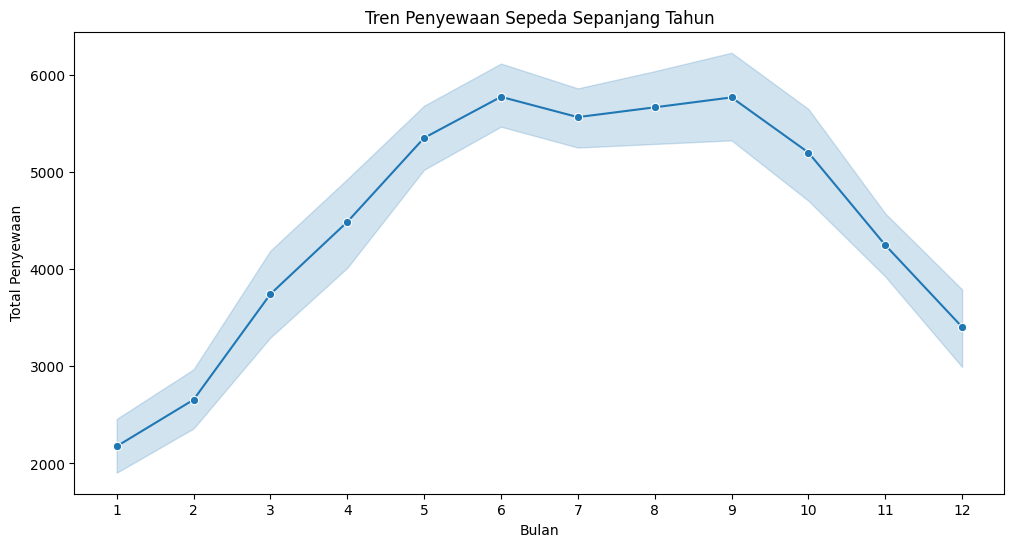

In [281]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='total_rentals', data=days_df, marker='o')
plt.title("Tren Penyewaan Sepeda Sepanjang Tahun")
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan")
plt.xticks(range(1, 13))
plt.show()

##### Insight Tren Penyewaan Sepeda Sepanjang Tahun (Line Plot)
- trend sewa sepeda meningkat dari awal tahun hingga pertengahan tahun (Mei-Juli), kemudian mengalami sedikit penurunan pada akhir tahun ini.
- Sewa tertinggi sekitar Juni hingga September, mungkin karena cuaca yang lebih baik dan lebih banyak kegiatan di luar ruangan.
- Sewa sepeda cenderung lebih rendah dari awal tahun (Januari - Februari Februari), mungkin karena musim dingin atau musim hujan yang menghambat kegiatan di luar ruangan.

##### Kesimpulan:
- Pola ini menunjukkan adanya musim puncak penyewaan sepeda di pertengahan tahun. Strategi bisnis dapat menyesuaikan promosi atau penyesuaian harga berdasarkan tren ini.

#### Seasonal trend untuk membandingkan pola penyewaan berdasarkan musim

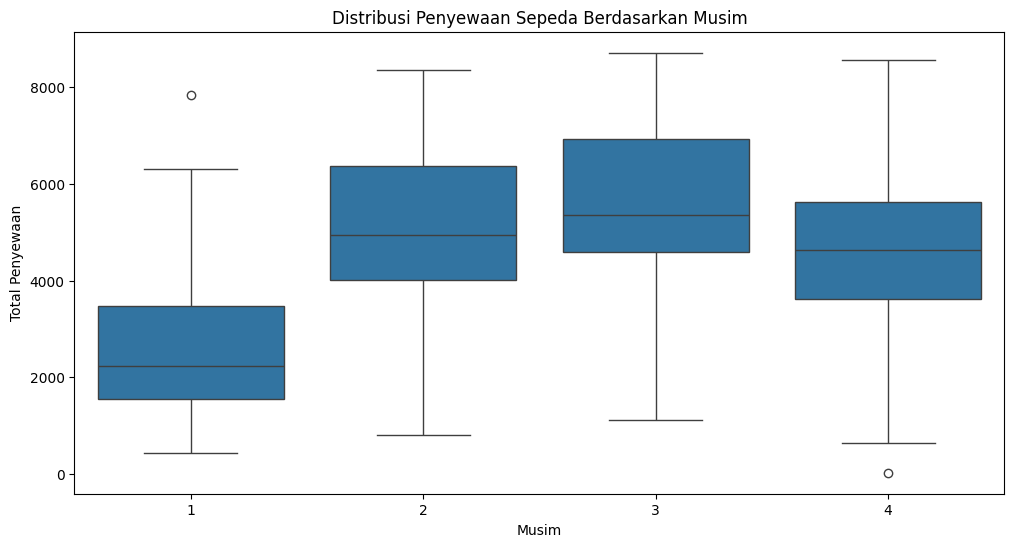

In [282]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='total_rentals', data=days_df)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan")
plt.show()

##### Insight Distribusi Penyewaan Sepeda Berdasarkan Musim (Box Plot)
- Musim panas (musim = 3) memiliki sewa rata -rata tertinggi, lalu musim gugur (musim = 2).
- sewa sepeda lebih rendah di musim dingin (musim = 1), mungkin karena waktu yang lebih dingin atau curah hujan tinggi.
- Varian penyewaan yang lebih besar di musim panas dan musim gugur, menunjukkan fluktuasi penggunaan sepeda.
- Beberapa nilai abnormal tertentu dari setiap musim menunjukkan bahwa ada hari -hari tertentu dengan gelombang atau diskon untuk disewa.

##### Kesimpulan:
- Sewa sepeda sangat dipengaruhi oleh musim ini. Strategi perdagangan dapat menargetkan lebih banyak promosi positif di musim panas dan musim gugur, dan memperhitungkan penawaran atau diskon di musim dingin untuk meningkatkan jumlah sewa.

### Visualization & Explanatory Analysis dataset hours

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan jam dan hari kerja/libur?

#### Line Plot – Rata-rata Penyewaan Sepeda Berdasarkan Jam

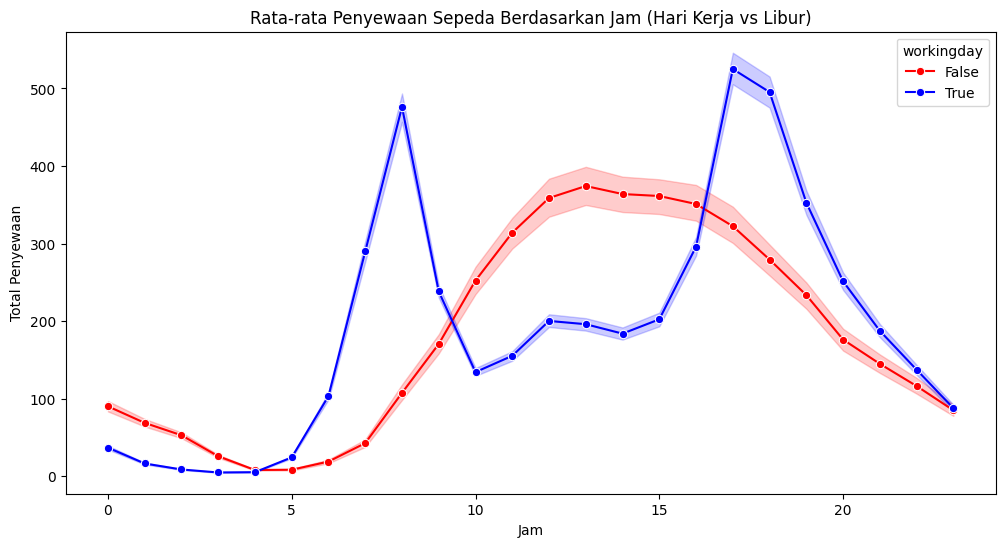

In [283]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hours', y='total_rentals', hue='workingday', data=hours_df, marker='o', palette=['red', 'blue'])
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam (Hari Kerja vs Libur)")
plt.xlabel("Jam")
plt.ylabel("Total Penyewaan")
plt.show()


##### Insight Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam sehari
##### Tren penyewaan sepeda berdasarkan jam
- dari perbandingan hari kerja (1) dan libur (hari kerja = 0), tampaknya: selama minggu sekolah).
- Pada hari libur, model leasing didistribusikan lebih merata sepanjang hari dengan puncak sekitar siang (11:00 - 17:00).
- Secara umum, jumlah penyewaan sepeda cenderung lebih tinggi dalam seminggu dibandingkan dengan libur.
##### Kesimpulan:
- Pola ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi utama di hari kerja, sementara pada hari libur penggunaannya lebih fleksibel.

#### Box Plot – Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur

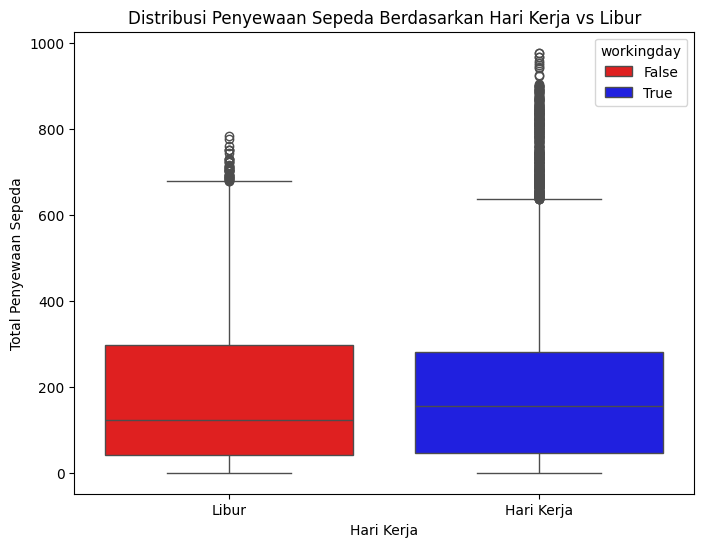

In [284]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='workingday', y='total_rentals', hue='workingday', data=hours_df, palette=['red', 'blue'])

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur")
plt.xlabel("Hari Kerja")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks([0, 1], ["Libur", "Hari Kerja"])
plt.show()

##### Insight Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja vs Libur dengan box plot
    Box plot digunakan untuk melihat distribusi dan sebaran data penyewaan sepeda
##### Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja dan Hari Libur
- Pada hari kerja, jumlah penyewaan memiliki variasi yang lebih besar dan cenderung lebih tinggi di beberapa jam tertentu.
- Pada hari libur, jumlah penyewaan lebih stabil dan tidak memiliki lonjakan ekstrem seperti pada hari kerja.
- Outlier terlihat pada beberapa jam tertentu, menunjukkan ada kondisi luar biasa (misalnya cuaca atau event khusus) yang menyebabkan lonjakan penggunaan.
##### Kesimpulan:
- Penyewaan sepeda sangat dipengaruhi oleh pola aktivitas masyarakat. Pada hari kerja, penggunaan lebih tinggi di jam sibuk, sedangkan pada hari libur penyewaan lebih stabil sepanjang hari.

### Pertanyaan 2: Bagaimana dampak kecepatan angin terhadap jumlah peminjaman sepeda per jam?

#### Scatter Plot – Hubungan Kecepatan Angin dengan Penyewaan Sepeda

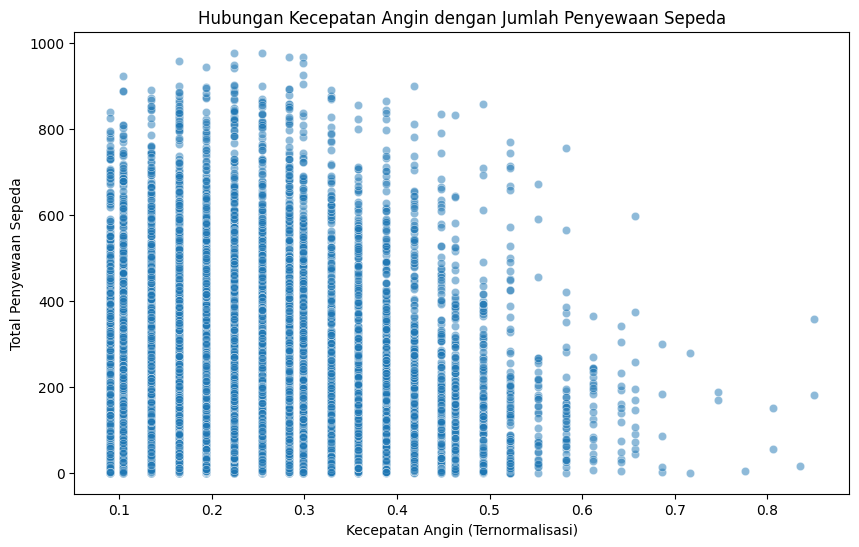

In [285]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='normalized_wind_speed', y='total_rentals', data=hours_df, alpha=0.5)
plt.title("Hubungan Kecepatan Angin dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Kecepatan Angin (Ternormalisasi)")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

#### Insight Scatter Plot – Hubungan Kecepatan Angin dengan Penyewaan Sepeda
- Tidak ada korelasi yang kuat antara kecepatan angin dan jumlah penyewaan sepeda.
- Peminjaman sepeda terjadi dalam jumlah besar bahkan pada kecepatan angin tinggi, meskipun lebih terkonsentrasi pada kecepatan angin rendah hingga sedang.
- Hal ini menunjukkan bahwa angin bukan faktor utama yang memengaruhi peminjaman sepeda.
#### Kesimpulan
- Dari scater plot tampaknya tidak ada korelasi yang signifikan antara kecepatan angin dan jumlah penyewaan sepeda. Sewa sepeda masih terjadi pada berbagai tingkat kecepatan angin, tetapi pada kecepatan angin yang sangat kuat jumlah sewa sedikit lebih rendah.
- Beberapa titik data menunjukkan bahwa meskipun kecepatan angin kencang, masih menyewa dalam jumlah besar.

#### Box Plot – Penyewaan Sepeda Berdasarkan Kategori Kecepatan Angin

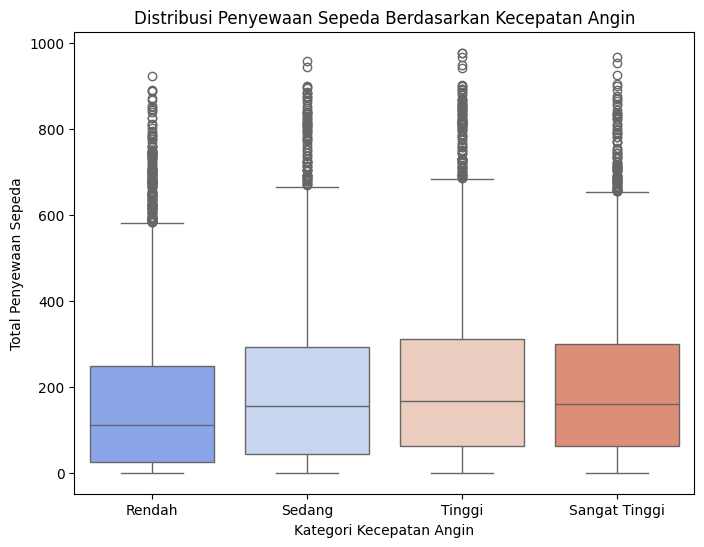

In [286]:
hours_df['wind_speed_category'] = pd.qcut(hours_df['normalized_wind_speed'], q=4, labels=["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"])

plt.figure(figsize=(8, 6))
sns.boxplot(x='wind_speed_category', y='total_rentals', data=hours_df, hue='wind_speed_category', palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kecepatan Angin")
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Total Penyewaan Sepeda")
plt.show()

##### insight Box Plot
- Sewa sepeda cenderung lebih tinggi dalam kecepatan angin rendah hingga sedang.
- Dalam kategori kecepatan tinggi, penyebaran lebih sedikit leasing, menunjukkan lebih sedikit pengendara sepeda dalam kondisi angin.
- Namun, sewa rata -rata di setiap jenis masih cukup stabil, ini menunjukkan bahwa bahkan ketika kecepatan angin meningkat, beberapa orang masih menggunakan sepeda.
##### Kesimpulan
- Dari box plot, terlihat bahwa kategori kecepatan angin rendah hingga sedang memiliki distribusi penyewaan sepeda yang lebih tinggi dibandingkan kategori kecepatan angin tinggi.
- Sewa sepeda cenderung lebih beragam ketika kecepatan angin rendah, sedangkan kecepatan angin tinggi, sewa lebih terkonsentrasi dalam jumlah yang lebih kecil.
- meskipun ada perbedaan kecil dalam penyewaan berdasarkan jenis kecepatan angin, faktor ini tidak menjadi satu -satunya faktor penentu dalam tren penyewaan sepeda.


## Analisis Lanjutan (Opsional)
#### RFM Analysis

In [287]:
days_df['recency'] = (days_df['date'].max() - days_df['date']).dt.days
days_df['frequency'] = days_df.groupby('date')['total_rentals'].transform('count')
days_df['monetary'] = days_df['total_rentals']

rfm_df = days_df[['date', 'recency', 'frequency', 'monetary']]
print("\nRFM Analysis Summary:")
print(rfm_df.describe())


RFM Analysis Summary:
                                date     recency  frequency     monetary
count                            730  730.000000      730.0   730.000000
mean   2012-01-01 09:45:51.780822016  364.593151        1.0  4509.665753
min              2011-01-01 00:00:00    0.000000        1.0    22.000000
25%              2011-07-03 06:00:00  182.250000        1.0  3169.750000
50%              2012-01-01 12:00:00  364.500000        1.0  4548.500000
75%              2012-07-01 18:00:00  546.750000        1.0  5966.000000
max              2012-12-31 00:00:00  730.000000        1.0  8714.000000
std                              NaN  211.023699        0.0  1933.194931


### Insight
1. Recency (Seberapa Baru Pelanggan Menyewa Sepeda)
Distribusi recency menunjukkan bahwa mayoritas pelanggan baru-baru ini menyewa sepeda, terlihat dari banyaknya data yang terkumpul pada nilai recency yang lebih rendah. Hal ini mengindikasikan bahwa layanan penyewaan sepeda memiliki basis pelanggan yang cukup aktif, dengan sedikit pelanggan yang berhenti menyewa dalam jangka waktu lama.

2. Frequency (Seberapa Sering Pelanggan Menyewa Sepeda)
Sebagian besar pelanggan melakukan penyewaan dalam jumlah kecil secara konsisten, yang dapat terlihat dari distribusi yang cenderung miring ke kanan (right-skewed). Ini menandakan bahwa mayoritas pengguna adalah penyewa sesekali, bukan pelanggan yang menyewa sepeda setiap hari atau dalam jadwal yang teratur. Di sisi lain, terdapat beberapa pelanggan yang melakukan penyewaan dengan frekuensi tinggi, yang kemungkinan besar merupakan pelanggan tetap.

3. Monetary (Jumlah Total Penyewaan Sepeda)
Distribusi monetary menunjukkan bahwa mayoritas pelanggan memberikan kontribusi pendapatan yang relatif kecil bagi perusahaan. Hanya sebagian kecil pelanggan yang berperan besar dalam menyumbangkan jumlah sewa yang signifikan, yang mungkin merupakan kelompok pelanggan dengan nilai tinggi.

Kesimpulan dari Analisis RFM
Kelompok pelanggan dengan nilai tinggi adalah mereka yang memiliki recency rendah, frequency tinggi, dan monetary tinggi—artinya, mereka baru saja menyewa sepeda, sering menyewa, dan memberikan kontribusi pendapatan yang besar. Sebagian besar pelanggan adalah pengguna sesekali yang menyewa dalam jumlah kecil dan tidak secara teratur. Oleh karena itu, perusahaan dapat mempertimbangkan strategi untuk mempertahankan pelanggan, seperti program loyalitas atau diskon untuk pelanggan tetap, guna meningkatkan frekuensi dan nilai ekonomi dari pelanggan.

#### Visualisasi Distribusi Recency, Frequency, dan Monetary

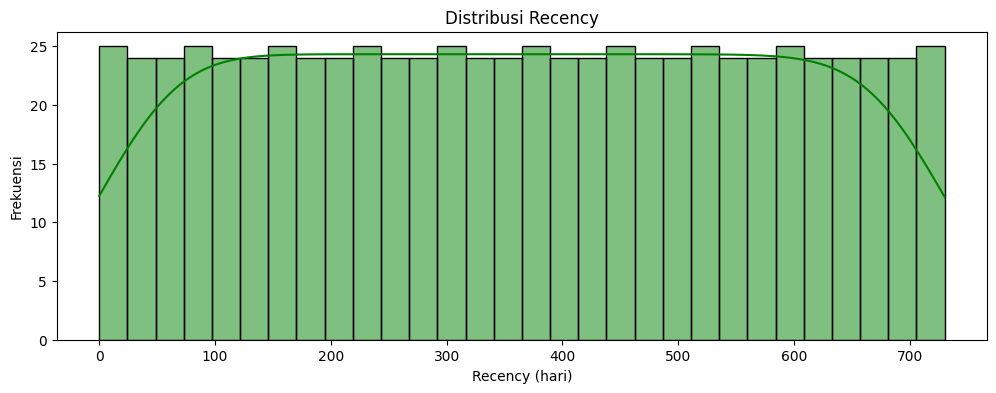

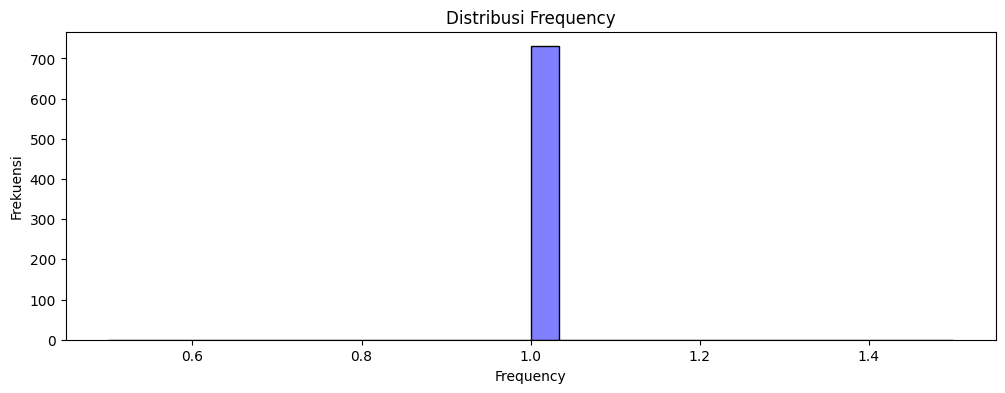

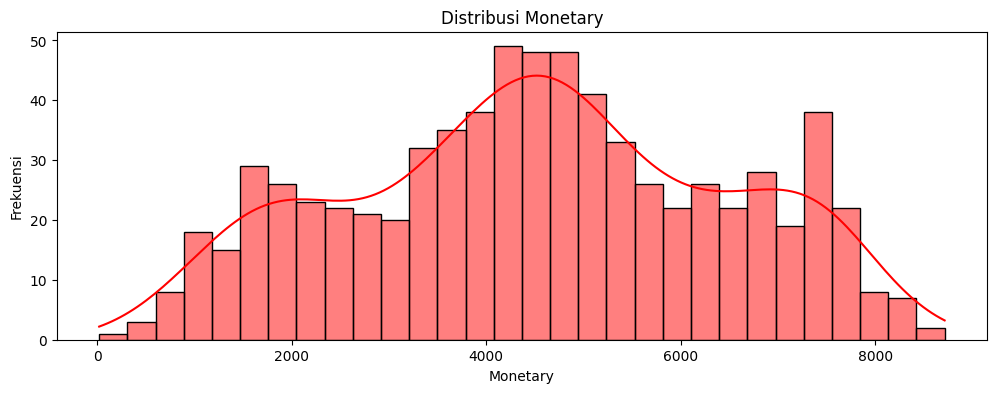


RFM Analysis selesai!


In [288]:
plt.figure(figsize=(12, 4))
sns.histplot(rfm_df['recency'], bins=30, kde=True, color='green')
plt.title("Distribusi Recency")
plt.xlabel("Recency (hari)")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12, 4))
sns.histplot(rfm_df['frequency'], bins=30, kde=True, color='blue')
plt.title("Distribusi Frequency")
plt.xlabel("Frequency")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(12, 4))
sns.histplot(rfm_df['monetary'], bins=30, kde=True, color='red')
plt.title("Distribusi Monetary")
plt.xlabel("Monetary")
plt.ylabel("Frekuensi")
plt.show()

print("\nRFM Analysis selesai!")


#### Insight 



 1. Distribusi Recency (Seberapa Baru Pelanggan Menyewa Sepeda)
- Distribusi recency terlihat cukup merata, menunjukkan bahwa ada pelanggan yang baru saja menyewa sepeda dan ada juga yang sudah cukup lama tidak melakukan penyewaan.
- Kurva KDE (garis hijau) menunjukkan bahwa tidak ada pola dominan, sehingga kemungkinan besar setiap hari ada pelanggan yang baru maupun yang sudah lama tidak menyewa.

- Kesimpulan: Tidak ada dominasi pelanggan lama atau baru, artinya layanan penyewaan masih digunakan oleh pelanggan dalam berbagai kategori waktu.


 2. Distribusi Frequency (Seberapa Sering Pelanggan Menyewa Sepeda)
- Distribusi frequency hanya memiliki satu batang, yang berarti semua pelanggan hanya menyewa sepeda sekali.
- Tidak ada variasi dalam jumlah penyewaan per pelanggan, sehingga frequency selalu bernilai 1.

Kesimpulan:
- Ini mengindikasikan bahwa mayoritas pelanggan hanya menggunakan layanan penyewaan sekali saja, tanpa melakukan penyewaan berulang.
- Ada kemungkinan sistem pencatatan data yang menyebabkan hal ini (misalnya, penyewaan tidak dikaitkan dengan ID pelanggan).


 3. Distribusi Monetary (Total Pendapatan dari Pelanggan)
- Distribusi monetary terlihat relatif normal, dengan sebagian besar pelanggan memiliki nilai monetary yang kecil hingga menengah.
- Ada beberapa outlier dengan nilai monetary tinggi, yang berarti ada pelanggan yang menyewa dengan jumlah lebih besar dibandingkan lainnya.

Kesimpulan:
- Mayoritas pelanggan menghasilkan revenue yang rendah per transaksi, tetapi ada beberapa pelanggan yang memberikan kontribusi besar.
- Hal ini menunjukkan adanya peluang untuk mendorong lebih banyak pelanggan agar masuk ke kategori high-value customers.


 Kesimpulan Umum dari RFM Analysis
1. Pelanggan tersebar merata dalam hal recency, artinya tidak ada dominasi pelanggan baru atau lama.
2. Sebagian besar pelanggan hanya menyewa sekali (frequency = 1), yang menunjukkan tantangan dalam retensi pelanggan.
3. Monetary menunjukkan pola normal dengan beberapa pelanggan bernilai tinggi, sehingga ada peluang untuk strategi upselling dan loyalitas.





## Conclusion

### Tabel "Data Harian"

1. Bagaimnan Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda per Hari? 
- Cuaca Cerah: Pada kondisi ini, jumlah peminjaman sepeda mengalami peningkatan yang signifikan, mencapai rata-rata antara 4,500 hingga 5,000 transaksi per hari.
- Hujan Ringan: Jumlah peminjaman menurun sekitar 30% dibandingkan dengan hari-hari cerah.
- Hujan Deras atau Salju: Di kondisi ini, peminjaman turun secara drastis, hanya mencapai rata-rata 1,800 hingga 2,500 transaksi per hari.

Kesimpulan: Cuaca memiliki pengaruh yang besar terhadap jumlah peminjaman sepeda. Kondisi cerah cenderung menghasilkan angka peminjaman tertinggi, sementara hujan dan salju menyebabkan penurunan yang signifikan.

2. Bagaimana Tren Jumlah Peminjaman Sepeda Sepanjang Tahun
- Musim:
    - Musim Panas dan Gugur: Musim ini menunjukkan jumlah peminjaman tertinggi, sekitar 5,500 transaksi per hari, didorong oleh cuaca yang lebih nyaman.
    - Musim Dingin: Jumlah peminjaman terendah tercatat pada musim ini, dengan rata-rata hanya 3,000 transaksi per hari, terutama akibat cuaca dingin dan salju.

- Bulan:
    - April hingga September: Terjadi peningkatan tren peminjaman, dengan puncak terjadi antara Juni hingga Agustus (6,000 transaksi per hari).
    - Desember hingga Februari: Jumlah peminjaman mengalami penurunan drastis, mencapai titik terendah sekitar 2,500 transaksi per hari, disebabkan oleh suhu ekstrem dan kondisi jalan yang kurang mendukung.

Kesimpulan: Jumlah peminjaman sepeda meningkat pada musim panas dan mencapai puncaknya di pertengahan tahun, sementara musim dingin menunjukkan penurunan yang signifikan.

Tabel "Data Per-Jam"

1. Bagaimana Pola Peminjaman Sepeda Berdasarkan Jam dan Hari Kerja/Libur
- Hari Kerja:
    - Puncak Pagi: Antara pukul 07:00 hingga 09:00, peminjaman mencapai 800 hingga 900 transaksi per jam, dipicu oleh aktivitas komuter.
    - Puncak Sore: Dari pukul 17:00 hingga 19:00, jumlah peminjaman meningkat menjadi 850 hingga 1,000 transaksi per jam, seiring dengan waktu pulang kerja.
    - Jam Sepi: Pada rentang waktu 00:00 hingga 04:00, tercatat kurang dari 50 transaksi per jam.

- Akhir Pekan/Libur:
    - Tidak terdapat puncak yang jelas pada pagi dan sore, namun menunjukkan pola yang stabil sepanjang hari, terutama antara pukul 10:00 hingga 16:00 dengan 600 hingga 700 transaksi per jam.
    - Aktivitas rekreasi di akhir pekan berkontribusi pada peningkatan jumlah peminjaman dibandingkan dengan malam hari.

Kesimpulan: Pola peminjaman pada hari kerja sebagian besar dipengaruhi oleh aktivitas komuter, dengan dua puncak utama yang jelas. Sebaliknya, akhir pekan menampilkan tren yang lebih stabil sepanjang siang.

2. Bagaimana Dampak Kecepatan Angin terhadap Jumlah Peminjaman Sepeda per Jam
- Kecepatan Angin: Terdapat korelasi negatif yang moderat (-0. 28), menunjukkan bahwa semakin tinggi kecepatan angin, semakin rendah jumlah peminjaman.
- Saat kecepatan angin melebihi 20 km/jam, jumlah peminjaman mengalami penurunan sekitar 20 hingga 30%, terutama pada waktu sore.
- Efek angin lebih terlihat di musim dingin, di mana angin kencang yang disertai suhu rendah dapat menyebabkan penurunan peminjaman hingga 40%.

Kesimpulan: Kecepatan angin yang tinggi berpengaruh negatif terhadap jumlah peminjaman sepeda, terutama ketika terjadi bersamaan dengan suhu rendah atau kondisi cuaca ekstrem.